In [1]:
import pandas as pd
import numpy as np

# set random seed for reproducibility
np.random.seed(42)

# number of samples
n = 200

# generate columns
sleep = np.random.normal(7, 1.5, n).clip(3, 10)          # 3–10 hours
screen = np.random.normal(6, 2, n).clip(1, 12)           # 1–12 hours
exercise = np.random.normal(1, 0.7, n).clip(0, 3)        # 0–3 hours
heart = np.random.normal(80, 10, n).clip(55, 120)        # 55–120 bpm

# now generate stress with logical relation
stress = (
    10 
    - 0.5*sleep
    + 0.4*screen
    - 0.7*exercise
    + 0.05*(heart - 80)
    + np.random.normal(0, 1, n)
).clip(1, 10)  # keep between 1–10

# create dataframe
df = pd.DataFrame({
    'Sleep_Hours': sleep.round(1),
    'Screen_Time': screen.round(1),
    'Exercise_Hours': exercise.round(1),
    'Heart_Rate': heart.round(0),
    'Stress_Level': stress.round(1)
})

df.head()

# save dataset
df.to_csv('stress_level_dataset.csv', index=False)
print("✅ Dataset created and saved as stress_level_dataset.csv")


✅ Dataset created and saved as stress_level_dataset.csv


In [2]:
df = pd.read_csv('stress_level_dataset.csv')

In [3]:
print(df.shape)


(200, 5)


In [4]:
print(df.info)

<bound method DataFrame.info of      Sleep_Hours  Screen_Time  Exercise_Hours  Heart_Rate  Stress_Level
0            7.7          6.7             0.0        88.0          10.0
1            6.8          7.1             0.6        71.0           8.1
2            8.0          8.2             1.0        89.0           9.1
3            9.3          8.1             1.0        94.0           8.1
4            6.6          3.2             0.7        84.0           7.3
..           ...          ...             ...         ...           ...
195          7.6          5.1             0.6        91.0           8.0
196          5.7          2.6             0.8        80.0           9.4
197          7.2          8.7             0.3        87.0          10.0
198          7.1          5.8             0.7        80.0           7.7
199          5.3          8.5             1.3        80.0          10.0

[200 rows x 5 columns]>


In [5]:
print(df.describe())

       Sleep_Hours  Screen_Time  Exercise_Hours  Heart_Rate  Stress_Level
count   200.000000    200.00000      200.000000  200.000000    200.000000
mean      6.925000      6.17250        0.964500   80.110000      8.365000
std       1.369178      1.92291        0.650929   10.171786      1.307987
min       3.100000      1.00000        0.000000   55.000000      4.300000
25%       5.900000      4.80000        0.400000   73.000000      7.475000
50%       7.000000      6.20000        0.950000   80.000000      8.550000
75%       7.725000      7.40000        1.400000   87.000000      9.500000
max      10.000000     12.00000        3.000000  106.000000     10.000000


In [6]:
df.head()

,Sleep_Hours,Screen_Time,Exercise_Hours,Heart_Rate,Stress_Level
0,7.7,6.7,0.0,88.0,10.0
1,6.8,7.1,0.6,71.0,8.1
2,8.0,8.2,1.0,89.0,9.1
3,9.3,8.1,1.0,94.0,8.1
4,6.6,3.2,0.7,84.0,7.3


In [7]:
print(df.isnull().sum())

Sleep_Hours       0
Screen_Time       0
Exercise_Hours    0
Heart_Rate        0
Stress_Level      0
dtype: int64


In [8]:
print(df.duplicated().sum)

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool>


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
X = df[['Sleep_Hours', 'Screen_Time', 'Exercise_Hours', 'Heart_Rate']]
y = df['Stress_Level']


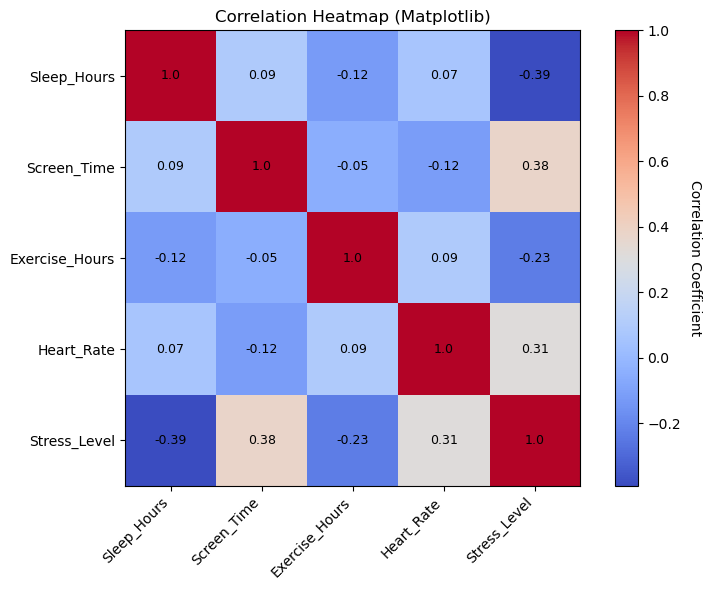

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix
corr = df.corr()

# Create heatmap manually
fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(corr, cmap='coolwarm', interpolation='nearest')

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15)

# Add tick labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.columns)

# Annotate values inside squares
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, round(corr.iloc[i, j], 2),
                       ha="center", va="center", color="black", fontsize=9)

plt.title("Correlation Heatmap (Matplotlib)")
plt.tight_layout()
plt.show()


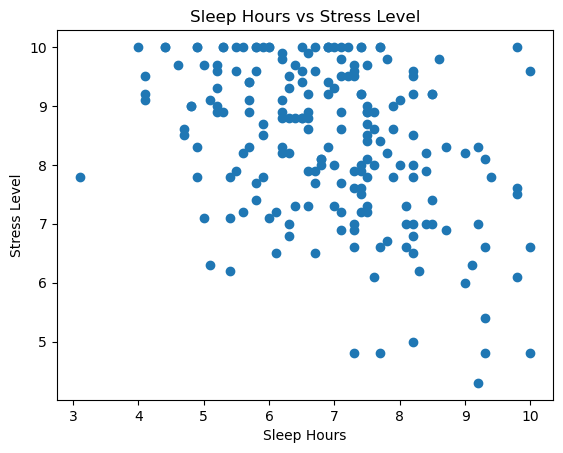

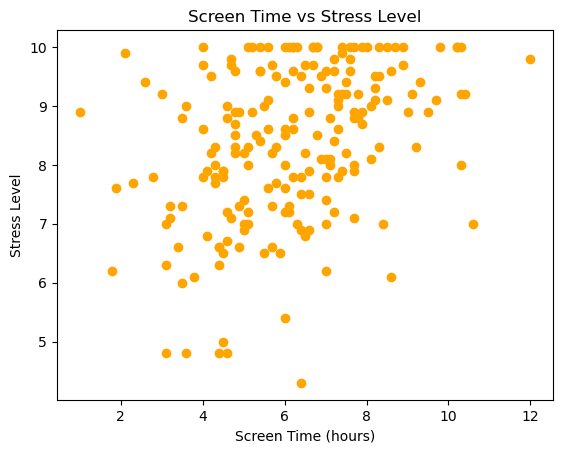

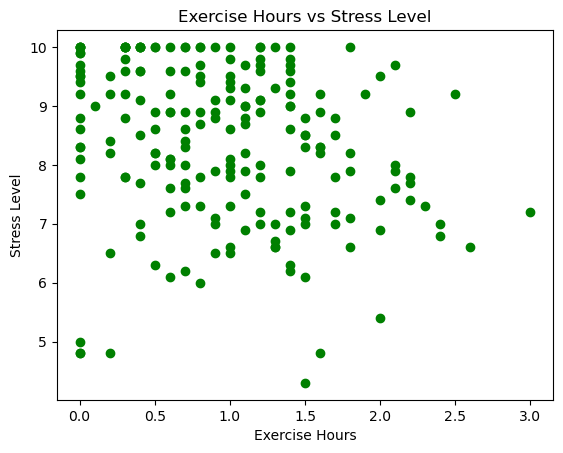

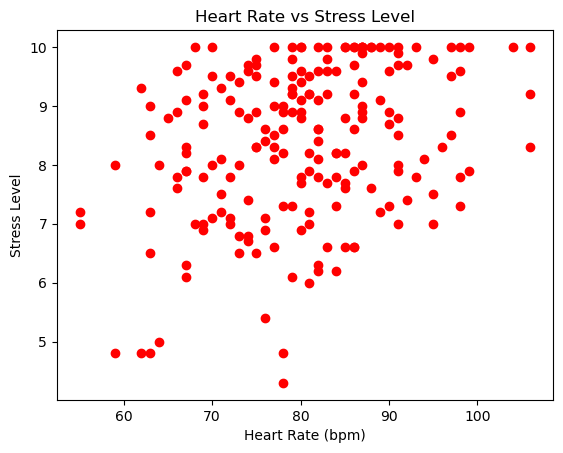

In [12]:
# Sleep Hours vs Stress
plt.scatter(df['Sleep_Hours'], df['Stress_Level'])
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.title("Sleep Hours vs Stress Level")
plt.show()

# Screen Time vs Stress
plt.scatter(df['Screen_Time'], df['Stress_Level'], color='orange')
plt.xlabel("Screen Time (hours)")
plt.ylabel("Stress Level")
plt.title("Screen Time vs Stress Level")
plt.show()

# Exercise Hours vs Stress
plt.scatter(df['Exercise_Hours'], df['Stress_Level'], color='green')
plt.xlabel("Exercise Hours")
plt.ylabel("Stress Level")
plt.title("Exercise Hours vs Stress Level")
plt.show()

# Heart Rate vs Stress
plt.scatter(df['Heart_Rate'], df['Stress_Level'], color='red')
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Stress Level")
plt.title("Heart Rate vs Stress Level")
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.8866635464021592
R² Score: 0.5692030711869769


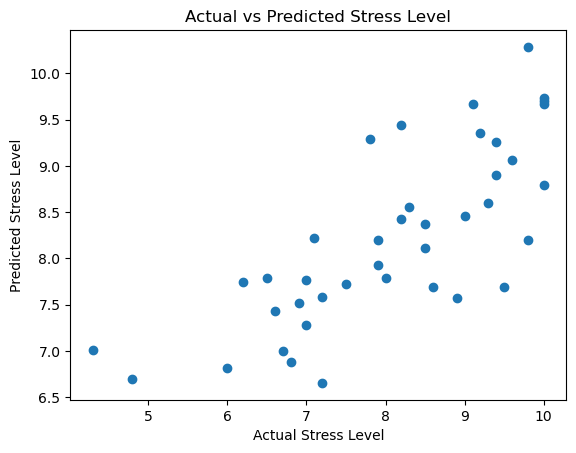

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Actual vs Predicted Stress Level")
plt.show()


In [17]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


                Coefficient
Sleep_Hours       -0.451098
Screen_Time        0.295544
Exercise_Hours    -0.590148
Heart_Rate         0.054970
